# Page View Time Series Visualizer

## Preview

## Process

Import libraries

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


### Data preparation

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date`column.

In [74]:
register_matplotlib_converters()

df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=["date"],index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Data cleaning: Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [75]:
df = df[
    (df.value <= df.value.quantile(0.975)) &
    (df.value >= df.value.quantile(0.025))
    ]

### 1. Line plot

Usea Matplotlib to draw a line chart. The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

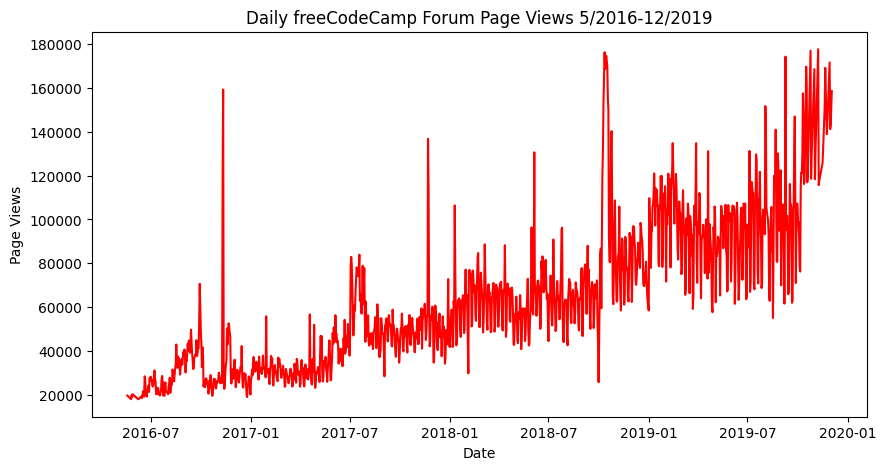

In [77]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['value'],color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
fig.savefig('line_plot.png')
plt.show()

### 2. Bar plot

Use Matplotlib to draw a bar chart. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

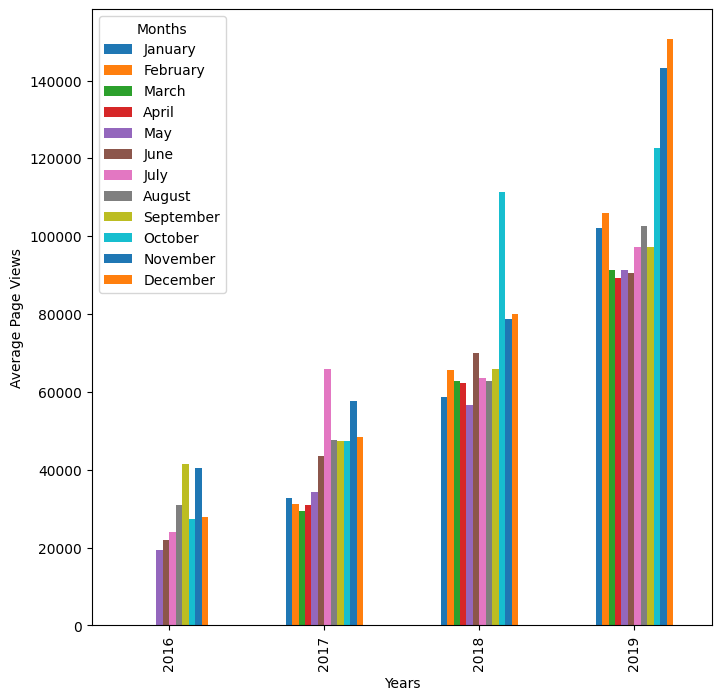

In [126]:
df['year'] = df.index.year
df['month'] = df.index.month

groupped_df = df.groupby(['year','month'])['value'].mean().reset_index()

pivot_index_is_year = groupped_df.pivot(index='year',columns='month',values='value')
fig = pivot_index_is_year.plot(kind="bar",xlabel="Years",ylabel="Average Page Views",figsize=(8,8))
fig.legend(['January', 'February', 'March', 'April', 'May', 'June', 
  'July', 'August', 'September', 'October', 'November', 'December'],title="Months")
fig = fig.figure
fig.savefig('bar_plot.png')
plt.show()


### 3. Box plot

 Use Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`.

<Axes: xlabel='year', ylabel='value'>

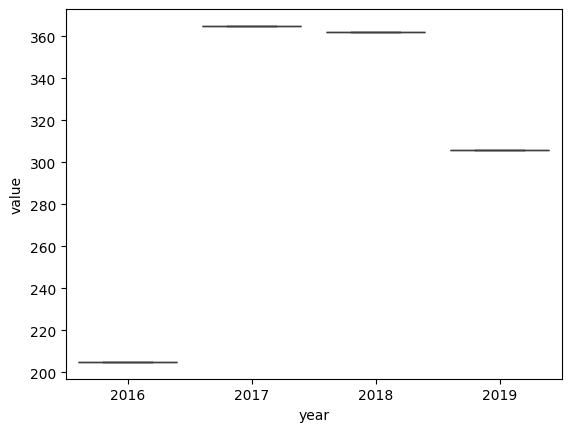

In [ ]:
# fig, ax = plt.subplots(1,2,figsize=(15,10))
month_df = df.groupby(['year','month'])['value'].sum().reset_index().pivot(index='year',columns='month',values='value')

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(
    x='year',
    y='value',
    data=year_df,
)
